In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mobile_data = pd.read_excel('Mobile_data.xlsx')

In [3]:
mobile_data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [4]:
mobile_data.tail()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,15999


## Shape of Dataset

In [5]:
mobile_data.shape

(541, 12)

In [6]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [7]:
mobile_data.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [8]:
mobile_data.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [9]:
mobile_data.drop('Unnamed: 0',axis = 1, inplace=True)

In [10]:
mobile_data.sample(4)
# It gives Random data for check

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
26,vivo T2x 5G,Marine Blue,128,4,5000,50MP,8MP,0,16.71,Dimensity 6020,12999
443,MOTOROLA g42,Metallic Rose,64,4,5000,50MP,16MP,0,16.43,Qualcomm Snapdragon 680,13999
489,MOTOROLA Edge 30 Ultra,Starlight White,256,6,4610,200MP,60MP,0,16.94,Qualcomm Snapdragon 8+ Gen 1,49999
57,MOTOROLA G62 5G,Midnight Gray,128,6,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 695 5G,15499


# Data Preprocessing:

In [11]:
mobile_data.rename(columns={'Battery_':'Battery Power in mAH','Rear Camera':'Rear Camera(In MP)','Front Camera':'Front Camera(In MP)','Processor_':'Phone Processor','Prize':'Phone Price'},inplace=True)

In [12]:
#New columns in datset
mobile_data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery Power in mAH',
       'Rear Camera(In MP)', 'Front Camera(In MP)', 'AI Lens', 'Mobile Height',
       'Phone Processor', 'Phone Price'],
      dtype='object')

In [13]:
# function to extract integer from mixed value (MP in Phone's Camera)
import re
def int_extracter(x):
    return re.search('\d+',x).group()

## Apply above function to Rear Camera Columns & Front Camera Columns usning lambda function

In [14]:
mobile_data['Rear Camera(In MP)'] = mobile_data['Rear Camera(In MP)'].apply(lambda x:int_extracter(x))

In [15]:
mobile_data['Front Camera(In MP)'] = mobile_data['Front Camera(In MP)'].apply(lambda x:int_extracter(x))

In [16]:
mobile_data.tail(5)

,Model,Colour,Memory,RAM,Battery Power in mAH,Rear Camera(In MP),Front Camera(In MP),AI Lens,Mobile Height,Phone Processor,Phone Price
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999
540,OPPO A77,Sky Blue,128,4,5000,50,8,0,16.66,Mediatek Helio G35,15999


In [17]:
mobile_data['Phone Price'] = mobile_data['Phone Price'].astype(float)

In [18]:
mobile_data['Rear Camera(In MP)'] = mobile_data['Rear Camera(In MP)'].astype(int)
mobile_data['Front Camera(In MP)'] = mobile_data['Front Camera(In MP)'].astype(int)

In [19]:
mobile_data.describe()

,Memory,RAM,Battery Power in mAH,Rear Camera(In MP),Front Camera(In MP),AI Lens,Mobile Height,Phone Price
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,46.110906,11.992606,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,31.260416,9.053746,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,13.000000,5.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,50.000000,8.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,50.000000,16.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,200.000000,60.000000,1.000000,41.940000,80999.000000


In [20]:
mobile_data.isnull().sum()
# There is No Null Values are present in dataset

Model                   0
Colour                  0
Memory                  0
RAM                     0
Battery Power in mAH    0
Rear Camera(In MP)      0
Front Camera(In MP)     0
AI Lens                 0
Mobile Height           0
Phone Processor         0
Phone Price             0
dtype: int64

In [21]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 541 non-null    object 
 1   Colour                541 non-null    object 
 2   Memory                541 non-null    int64  
 3   RAM                   541 non-null    int64  
 4   Battery Power in mAH  541 non-null    int64  
 5   Rear Camera(In MP)    541 non-null    int32  
 6   Front Camera(In MP)   541 non-null    int32  
 7   AI Lens               541 non-null    int64  
 8   Mobile Height         541 non-null    float64
 9   Phone Processor       541 non-null    object 
 10  Phone Price           541 non-null    float64
dtypes: float64(2), int32(2), int64(4), object(3)
memory usage: 42.4+ KB


## Outliers

<Axes: ylabel='Phone Price'>

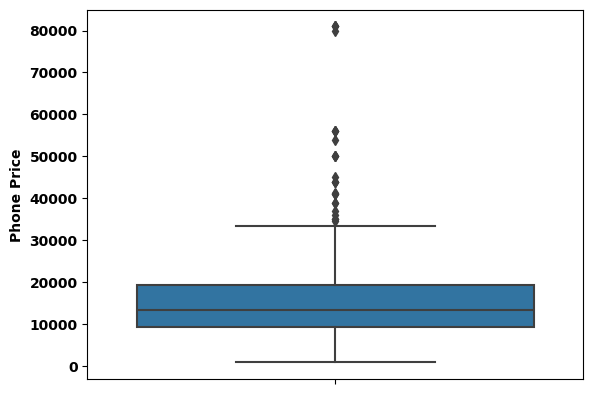

In [22]:
sns.boxplot(data = mobile_data,y = 'Phone Price')

In [23]:
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [24]:
# Make variables for lower and upper limit
lower_limit_iqr,upper_limit_iqr = iqr_technique(mobile_data['Phone Price'])

In [25]:
# Cap the outliers
mobile_data['Phone Price'] = np.where(mobile_data['Phone Price']>upper_limit_iqr,upper_limit_iqr,np.where(mobile_data['Phone Price']<lower_limit_iqr,lower_limit_iqr,mobile_data['Phone Price']))

## Box plot of Phone Price after removing outliers

<Axes: ylabel='Phone Price'>

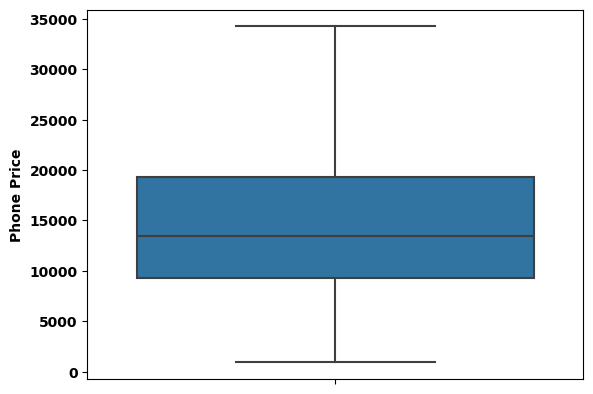

In [26]:
sns.boxplot(data = mobile_data,y = 'Phone Price')

## Check duplicate Values in Dataset and remove them

In [27]:
print("\nDuplicate Rows:")
print(mobile_data[mobile_data.duplicated()])


Duplicate Rows:
                     Model          Colour  Memory  RAM  Battery Power in mAH  \
27             vivo T2x 5G     Marine Blue     128    6                  5000   
48            MOTOROLA e32     Arctic Blue      64    4                  5000   
91   SAMSUNG Galaxy F14 5G   B.A.E. Purple     128    4                  6000   
132  SAMSUNG Galaxy F14 5G       OMG Black     128    6                  6000   
247              redmi min             M3)      16    4                  1000   
344         Tecno Spark 9T  Turquoise Cyan      64    4                  5000   
352         POCO X4 Pro 5G     Laser Black     128    8                  5000   
424            realme C30s    Stripe Black      64    4                  5000   
437           vivo Y100 5G    Pacific Blue     128    8                  4500   
480               POCO C31      Royal Blue      64    4                  5000   

     Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
27                 

In [28]:
# Drop Duplicates
mobile_data.drop_duplicates(inplace=True)

## Visualize the relationship between Phone price and AI Lens

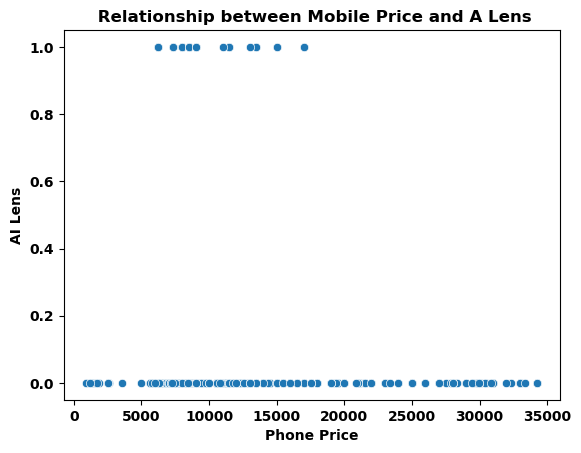

In [29]:
sns.scatterplot(data = mobile_data,x = 'Phone Price',y= 'AI Lens')
plt.title(' Relationship between Mobile Price and A Lens')
plt.show()
# No proper relations b/w these two

## Visualize the relationship between Phone Price and Mobile Height

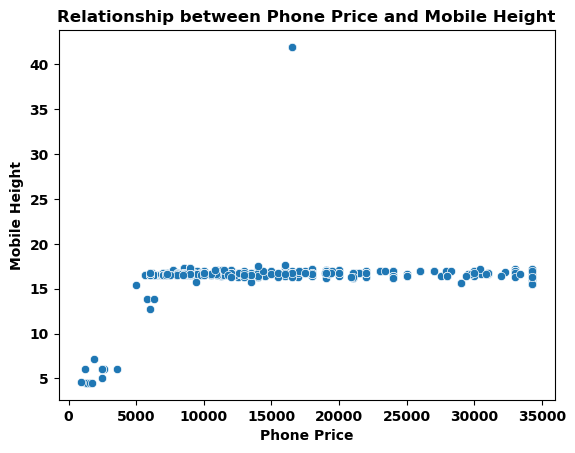

In [30]:
sns.scatterplot(data = mobile_data,x = 'Phone Price',y= 'Mobile Height')
plt.title('Relationship between Phone Price and Mobile Height')
plt.show()
# No proper relations b/w these two

# Feature Extraction

## Remove AI Lens and Mobile hight columns as these features are not affecting the price of Mobile

In [31]:
mobile_data.drop(['AI Lens','Mobile Height'],axis = 1, inplace=True)

In [32]:
#Head of New Data
mobile_data.head()

,Model,Colour,Memory,RAM,Battery Power in mAH,Rear Camera(In MP),Front Camera(In MP),Phone Processor,Phone Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32,2,5000,8,5,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,G37,8999.0


# Feature Creation

In [33]:
# Make a feature for Camera Quality index by adding both the camera's
def concat_colums(x,y):
    if x>0 and y>0:
        return str(x) + '+' + str(y)
    elif x==0 and y>0 :
        return str(y)
    elif x>0 and y == 0:
        return str(x)
    else:
        return str(0)
concat_colums(0,0)    

'0'

In [34]:
# Apply function in dataset to add new feature
mobile_data['Camera quality index (Front + Rear specs in MP)'] = mobile_data.apply(lambda x: concat_colums(x['Front Camera(In MP)'],x['Rear Camera(In MP)']),axis = 1)

In [35]:
# Make a feature for Phone Storage by adding both memory columns
mobile_data['Phone storage(RAM +ROM in GB)'] = mobile_data.apply(lambda x: concat_colums(x['RAM'],x['Memory']),axis = 1)

In [36]:
# Values counts of Phone storage
mobile_data['Phone storage(RAM +ROM in GB)'].value_counts()

Phone storage(RAM +ROM in GB)
4+64     128
8+128    112
6+128    100
4+128     41
8+256     40
3+32      29
2+32      22
6+64      15
2+64      11
3+64       9
4+256      8
6+256      4
2+16       2
8+64       2
4+16       2
2+256      2
3+256      1
4+32       1
8+16       1
3+128      1
Name: count, dtype: int64

In [37]:
# Values counts of Camara Quality index
mobile_data['Camera quality index (Front + Rear specs in MP)'].value_counts()

Camera quality index (Front + Rear specs in MP)
8+50      91
16+50     82
5+8       50
5+13      45
5+50      38
16+64     35
16+108    25
13+50     25
13+48     18
8+13      17
32+50     12
8+64      11
16+48     10
0          9
2          6
16+200     6
12+12      5
32+64      5
13+64      4
50+64      4
2+5        3
50+50      3
32+108     3
8+48       2
16+32      2
60+108     2
60+200     2
44+50      2
16+40      2
8+12       2
8+108      1
8+16       1
8+8        1
10+50      1
32+48      1
32+12      1
20+12      1
20+64      1
10+12      1
12+50      1
Name: count, dtype: int64

In [38]:
# Head of Data now after feature engineering
mobile_data.head()

,Model,Colour,Memory,RAM,Battery Power in mAH,Rear Camera(In MP),Front Camera(In MP),Phone Processor,Phone Price,Camera quality index (Front + Rear specs in MP),Phone storage(RAM +ROM in GB)
0,Infinix SMART 7,Night Black,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0,5+13,4+64
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0,5+13,4+64
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,Qualcomm Snapdragon 680,11999.0,16+50,8+128
3,POCO C50,Royal Blue,32,2,5000,8,5,Mediatek Helio A22,5649.0,5+8,2+32
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,G37,8999.0,5+50,8+128


In [39]:
mobile_data.to_csv('Final_mobile_data.csv')

## Correlation of standard Mobile data

In [40]:
correlation_matrix = mobile_data.corr(numeric_only=True)

In [41]:
correlation_matrix

,Memory,RAM,Battery Power in mAH,Rear Camera(In MP),Front Camera(In MP),Phone Price
Memory,1.000000,0.624728,-0.070355,0.527890,0.493396,0.674231
RAM,0.624728,1.000000,-0.112560,0.437132,0.491954,0.649396
Battery Power in mAH,-0.070355,-0.112560,1.000000,0.191132,0.021995,0.017919
Rear Camera(In MP),0.527890,0.437132,0.191132,1.000000,0.502209,0.535294
Front Camera(In MP),0.493396,0.491954,0.021995,0.502209,1.000000,0.649018
Phone Price,0.674231,0.649396,0.017919,0.535294,0.649018,1.000000


## Heat map of dataset

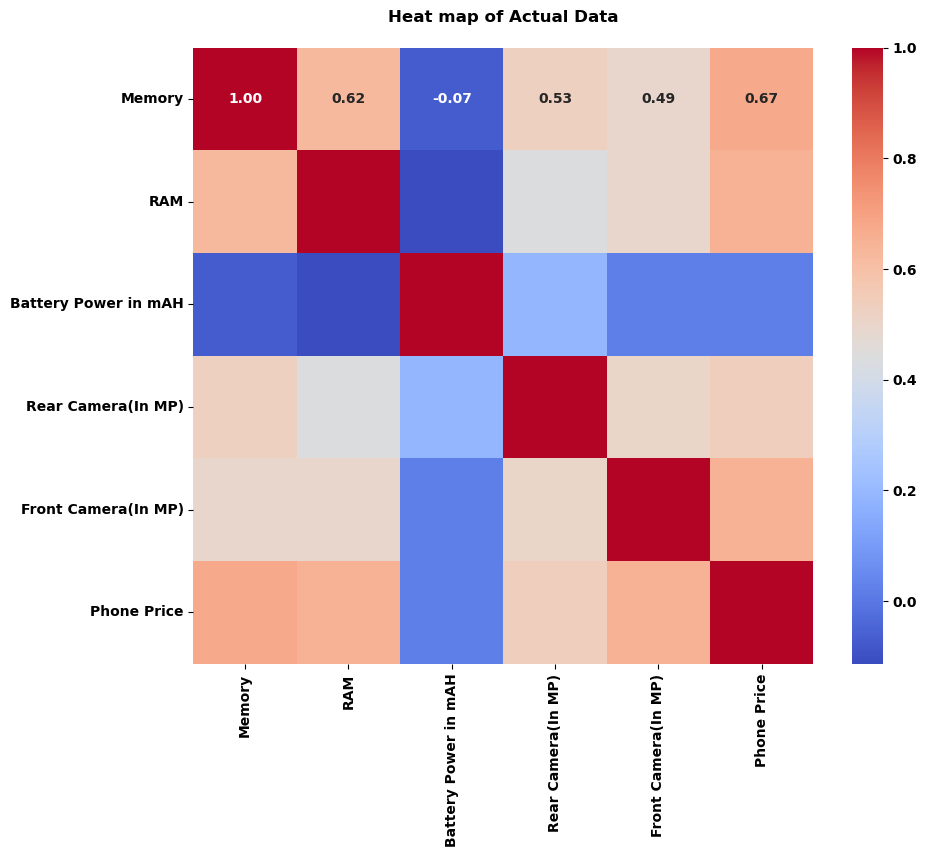

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot= True,cmap='coolwarm',fmt=".2f")
plt.title('Heat map of Actual Data\n')
plt.show()

# Converting Categorical Variables into Numerical Variables using One-Hot Encoding

In [43]:
categorical_cols = ['Model', 'Colour', 'Phone Processor','Phone storage(RAM +ROM in GB)','Camera quality index (Front + Rear specs in MP)']
encoded_mobile_data = pd.get_dummies(mobile_data,columns=categorical_cols,drop_first=True,dtype=int)

In [44]:
encoded_mobile_data

,Memory,RAM,Battery Power in mAH,Rear Camera(In MP),Front Camera(In MP),Phone Price,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,...,Camera quality index (Front + Rear specs in MP)_60+108,Camera quality index (Front + Rear specs in MP)_60+200,Camera quality index (Front + Rear specs in MP)_8+108,Camera quality index (Front + Rear specs in MP)_8+12,Camera quality index (Front + Rear specs in MP)_8+13,Camera quality index (Front + Rear specs in MP)_8+16,Camera quality index (Front + Rear specs in MP)_8+48,Camera quality index (Front + Rear specs in MP)_8+50,Camera quality index (Front + Rear specs in MP)_8+64,Camera quality index (Front + Rear specs in MP)_8+8
0,64,4,6000,13,5,7299.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,64,4,6000,13,5,7299.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,128,8,5000,50,16,11999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,2,5000,8,5,5649.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,8,5000,50,5,8999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,256,8,3900,50,12,34265.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,32,2,3100,5,2,5998.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,64,4,5000,50,8,9990.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
539,128,8,5000,50,32,34265.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Training & Testing of Data

In [46]:
x = encoded_mobile_data.drop('Phone Price',axis = 1)
y = encoded_mobile_data['Phone Price']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [48]:
x_train.head()

,Memory,RAM,Battery Power in mAH,Rear Camera(In MP),Front Camera(In MP),Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,...,Camera quality index (Front + Rear specs in MP)_60+108,Camera quality index (Front + Rear specs in MP)_60+200,Camera quality index (Front + Rear specs in MP)_8+108,Camera quality index (Front + Rear specs in MP)_8+12,Camera quality index (Front + Rear specs in MP)_8+13,Camera quality index (Front + Rear specs in MP)_8+16,Camera quality index (Front + Rear specs in MP)_8+48,Camera quality index (Front + Rear specs in MP)_8+50,Camera quality index (Front + Rear specs in MP)_8+64,Camera quality index (Front + Rear specs in MP)_8+8
409,128,8,4050,50,44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,128,6,4500,32,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,64,4,5000,50,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521,64,4,5000,13,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,256,8,4400,50,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
x_train_scaled

array([[ 0.27821777,  1.30102845, -1.13253797, ..., -0.46732302,
        -0.16320044, -0.04862166],
       [ 0.27821777,  0.29531092, -0.52436805, ..., -0.46732302,
        -0.16320044, -0.04862166],
       [-0.77975831, -0.7104066 ,  0.1513763 , ..., -0.46732302,
        -0.16320044, -0.04862166],
       ...,
       [-0.77975831, -0.7104066 ,  1.502865  , ..., -0.46732302,
        -0.16320044, -0.04862166],
       [-0.77975831, -0.7104066 ,  1.502865  , ..., -0.46732302,
        -0.16320044, -0.04862166],
       [ 0.27821777,  1.30102845,  0.1513763 , ..., -0.46732302,
        -0.16320044, -0.04862166]])

# Machine learning Models

## Linear Regression

In [51]:
lr_model = LinearRegression()

In [52]:
lr_model.fit(x_train_scaled,y_train)

LinearRegression()

In [53]:
y_prediction = lr_model.predict(x_test_scaled)

In [54]:
# Score of model
lr_model.score(x_test_scaled,y_test)
# Model is giving negative score

-1.7988363501263202e+26

In [55]:
# Mean Absolute Error
mae1 = mean_absolute_error(y_test, y_prediction)
mae1

6.0384215760984984e+16

In [56]:
# Root Mean Square Score
rmse1 = mean_squared_error(y_test, y_prediction, squared=False)
rmse1

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.0882009093741371e+17

In [57]:
# R2 score
r2_ = r2_score(y_test, y_prediction)
r2_

-1.7988363501263202e+26

## Random Forest

In [58]:
rf_model = RandomForestRegressor()

In [59]:
rf_model.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [60]:
y_pred = rf_model.predict(x_test_scaled)

In [61]:
rf_model.score(x_test_scaled,y_test)

0.8766048756451927

### Evaluate the model

In [62]:
mae = mean_absolute_error(y_test, y_pred)

In [63]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [64]:
mae

1492.2721495327105

In [65]:
rmse

2850.1141676047487

In [66]:
# R2 score
r2 = r2_score(y_test, y_pred)
r2

0.8766048756451927

In [67]:
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean R2 score Error:", r2)

Mean Absolute Error: 1492.2721495327105
Root Mean Squared Error: 2850.1141676047487
Mean R2 score Error: 0.8766048756451927


## Plot of Test target and Predicted target with Random Forest Model

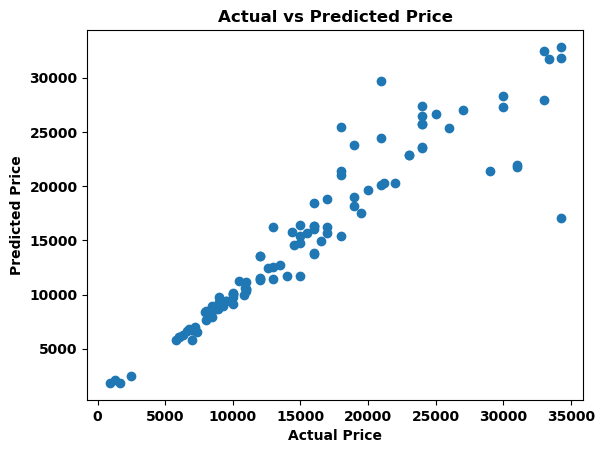

In [68]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

Random Forest Model giving good results with test data and accuracy is more than 88%.

## Linear Regression Model

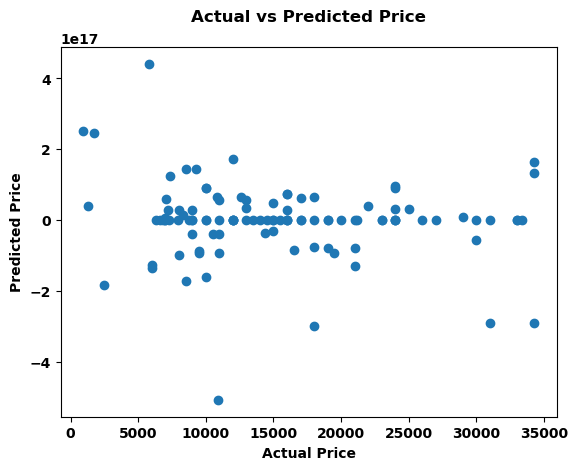

In [69]:
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price\n')
plt.show()
# Model is npt showing proper result for test dataset

# Feature Importance Analysis:

In [70]:
# For linear regression, we can analyze the coefficients of the model
feature_importance = pd.DataFrame({'Feature': encoded_mobile_data.drop('Phone Price',axis = 1).columns, 'Coefficient': lr_model.coef_})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

                   Feature   Coefficient
10     Model_I Kall Z19Pro  4.417274e+16
41      Model_MOTOROLA G32  4.207736e+16
171        Model_redmi min  2.800837e+16
149      Model_realme C21Y  2.620673e+16
12     Model_IQOO Neo 7 5G  2.591264e+16
..                     ...           ...
89   Model_REDMI 10A SPORT -2.673807e+16
397    Colour_Satin Silver -2.797335e+16
339    Colour_Mineral Gray -2.797335e+16
213       Colour_Baby Blue -2.866587e+16
70      Model_OnePlus Nord -2.881175e+16

[645 rows x 2 columns]


## Top 15 Most important features

In [71]:
feature_importance.sort_values(by='Coefficient', ascending=False)[0:15]

,Feature,Coefficient
10,Model_I Kall Z19Pro,4.417274e+16
41,Model_MOTOROLA G32,4.207736e+16
171,Model_redmi min,2.800837e+16
149,Model_realme C21Y,2.620673e+16
12,Model_IQOO Neo 7 5G,2.591264e+16
148,Model_realme C11 2021,2.577388e+16
222,Colour_CHARCOAL BLACK,2.459917e+16
513,Phone Processor_Mediatek Dimensity 810,2.380024e+16
280,Colour_Glimmer Black,2.292811e+16
321,Colour_Marine Blue,2.292811e+16


## Random Forest model

In [72]:
# get the feature importance
feature_importances = rf_model.feature_importances_

In [73]:
# Create a dataframe to visualize the feature importances
feature_importances_df = pd.DataFrame({'Feature': encoded_mobile_data.drop('Phone Price',axis = 1).columns, "Importance": feature_importances})

In [74]:
# Sort the data by importance in the descending order
feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)

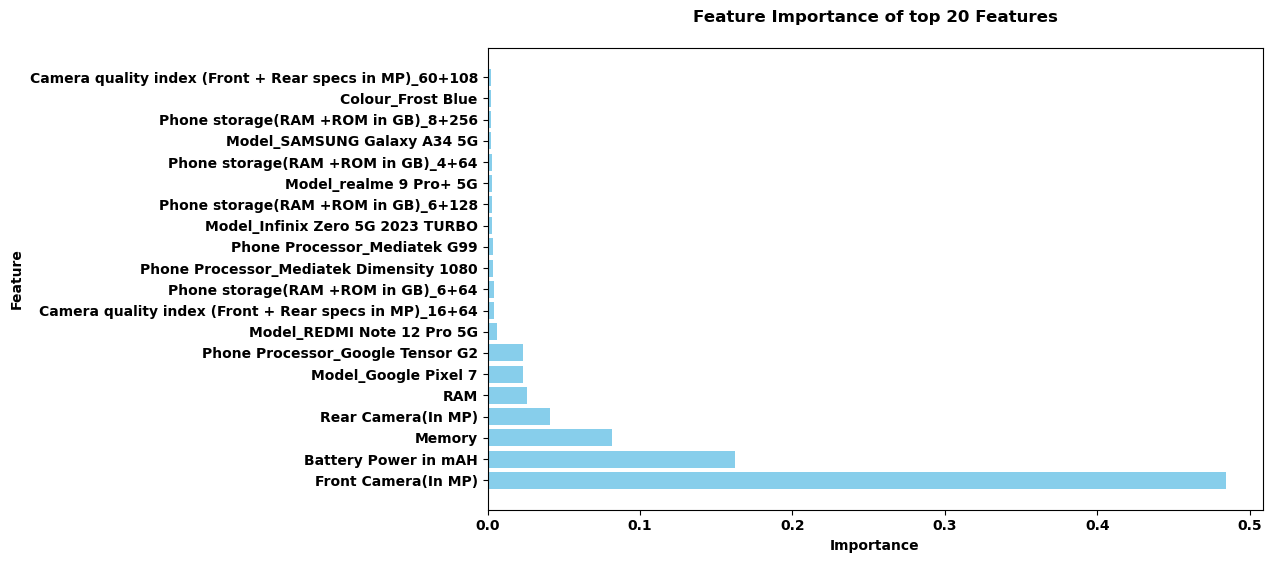

In [75]:
# Plot the feature importance(Top 20 features)
plt.figure(figsize=(10,6))
plt.barh(feature_importances_df['Feature'][0:20], feature_importances_df["Importance"][0:20], color='skyblue')
plt.xlabel('Importance')
plt.ylabel("Feature")
plt.title('Feature Importance of top 20 Features\n')
plt.show()

## Phone Price variation with phone's momery

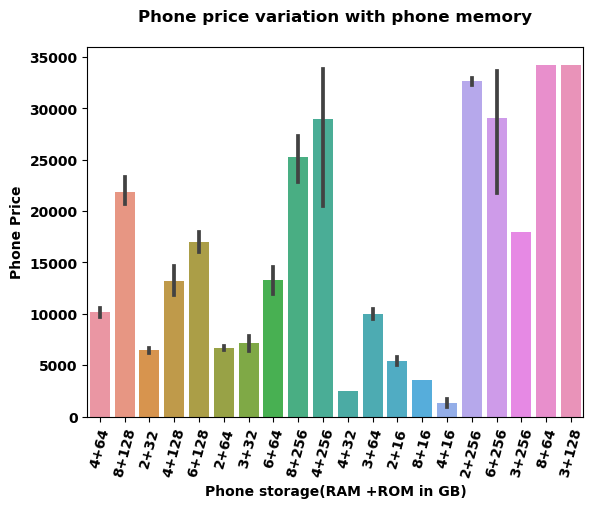

In [76]:
sns.barplot(data = mobile_data,x="Phone storage(RAM +ROM in GB)",y = 'Phone Price')
plt.xticks(rotation = 75)
plt.title('Phone price variation with phone memory\n')
plt.show()

### Mobile price variation with Phone's Memory (Scatter Plot)

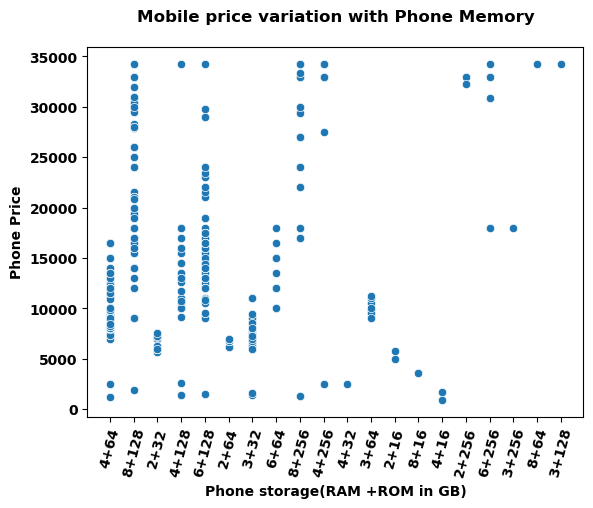

In [77]:
sns.scatterplot(data = mobile_data,x="Phone storage(RAM +ROM in GB)",y = 'Phone Price')
plt.xticks(rotation = 75)
plt.title('Mobile price variation with Phone Memory\n')
plt.show()

### Mobile price variation with camera quality index in phone (Bar Plot)

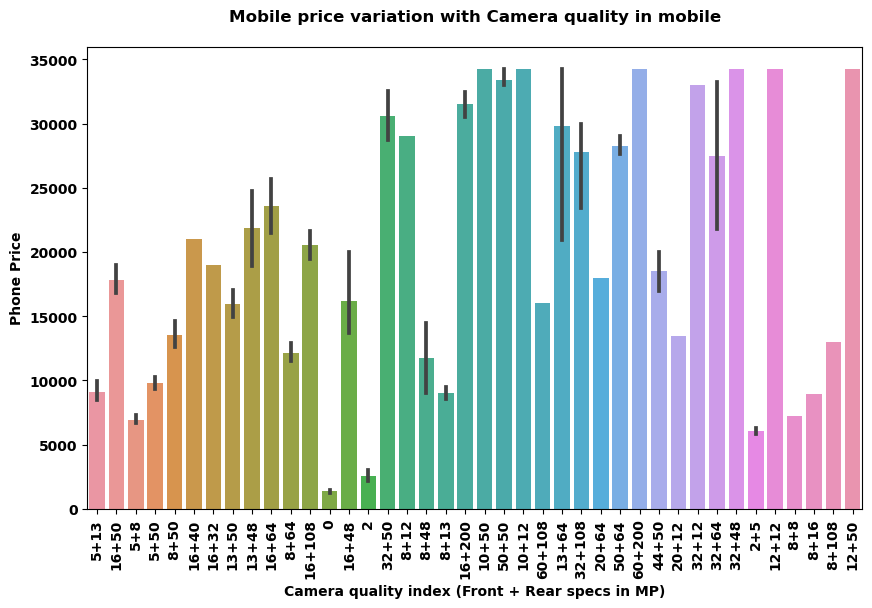

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(data = mobile_data,x="Camera quality index (Front + Rear specs in MP)",y = 'Phone Price')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Camera quality in mobile\n')
plt.show()

### Mobile price variation with camera quality index  in phone(Scatter Plot)

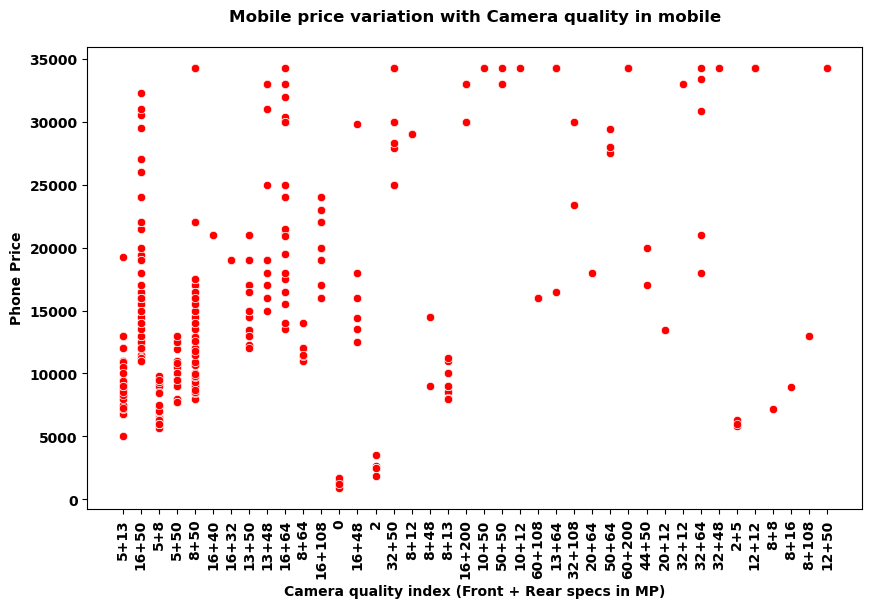

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = mobile_data,x="Camera quality index (Front + Rear specs in MP)",y = 'Phone Price',color='red')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Camera quality in mobile\n')
plt.show()

In [80]:
### Mobile price variation with Battery Capacity in mobile (Bar Plot)

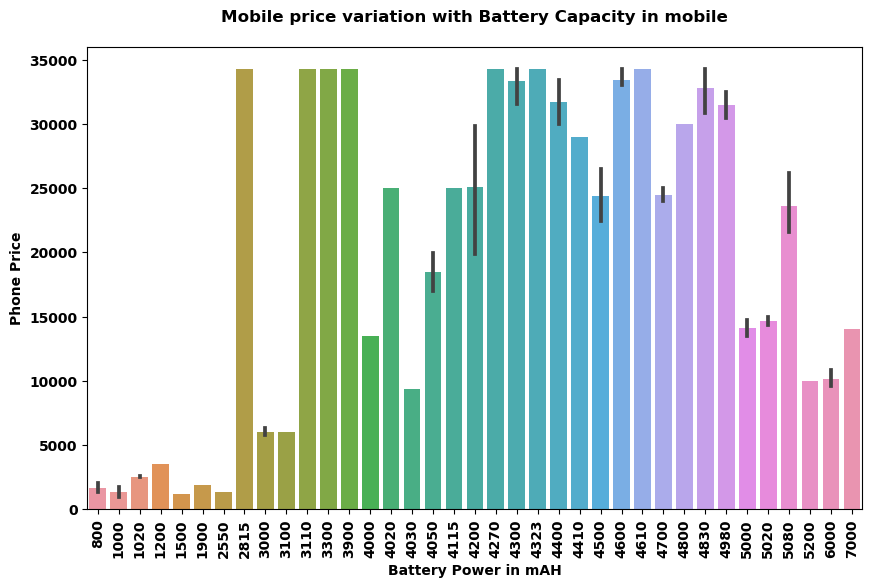

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(data = mobile_data,x="Battery Power in mAH",y = 'Phone Price')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Battery Capacity in mobile\n')
plt.show()

### Mobile price variation with Battery size

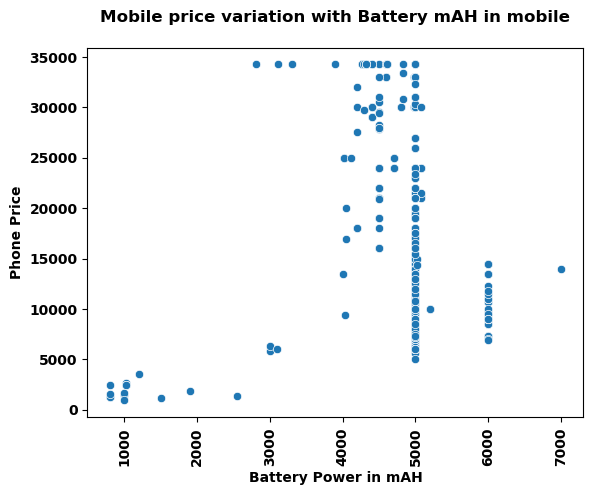

In [82]:
sns.scatterplot(data = mobile_data,x="Battery Power in mAH",y = 'Phone Price')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Battery mAH in mobile\n')
plt.show()

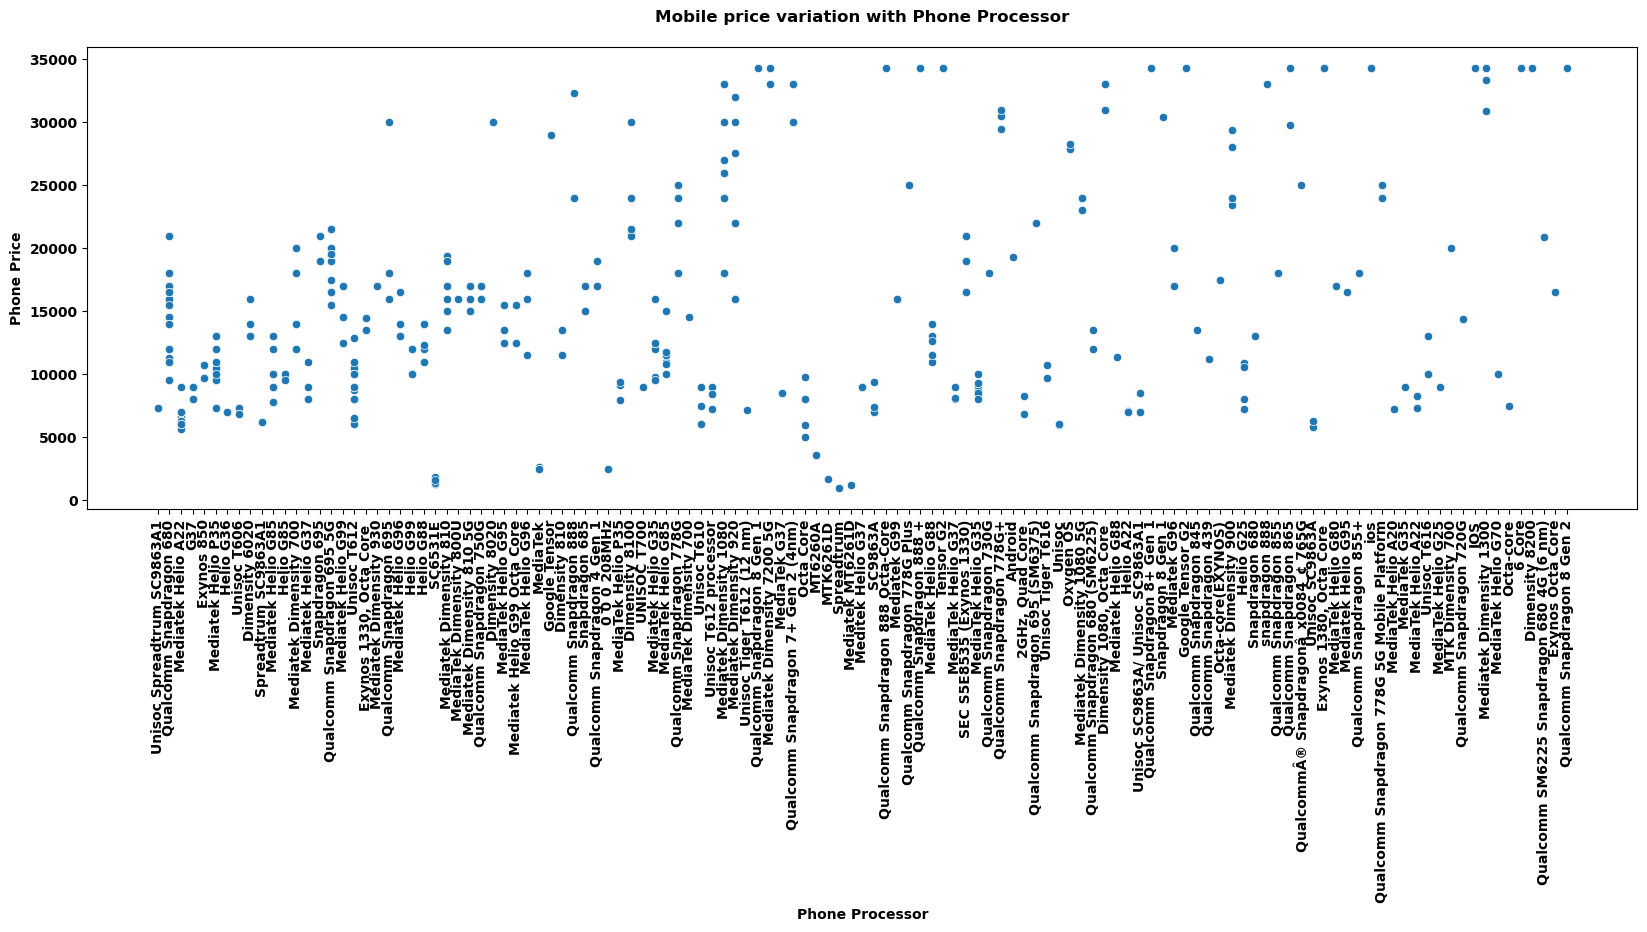

In [83]:
plt.figure(figsize=(20,6))
sns.scatterplot(data = mobile_data,y = 'Phone Price',x="Phone Processor")
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Phone Processor\n')
plt.show()

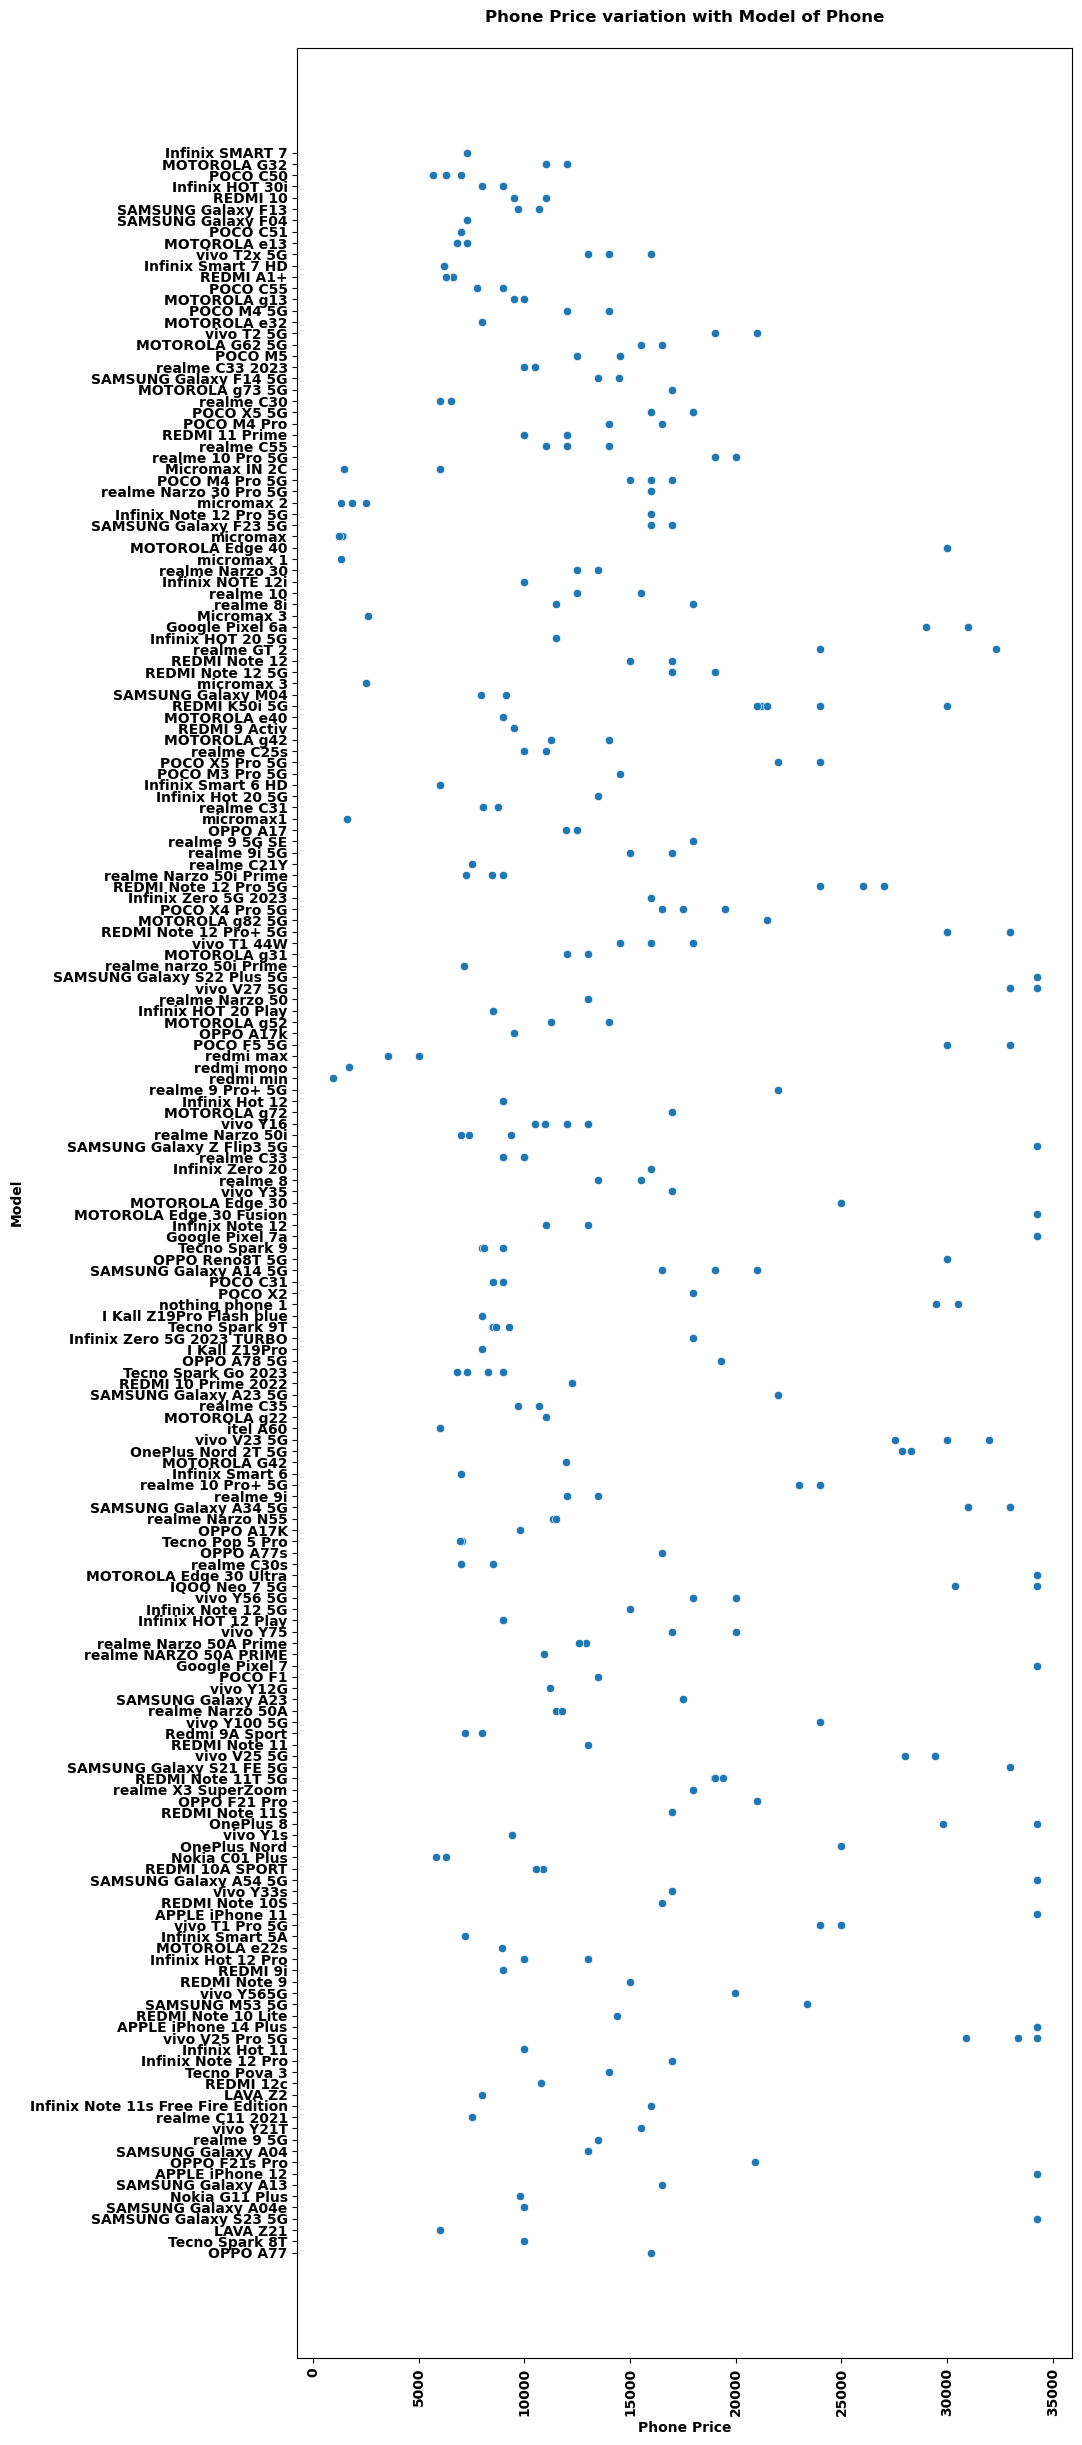

In [84]:
plt.figure(figsize=(10,30))
sns.scatterplot(data = mobile_data,x = 'Phone Price',y="Model")
plt.xticks(rotation = 90)
plt.title('Phone Price variation with Model of Phone\n')
plt.show()

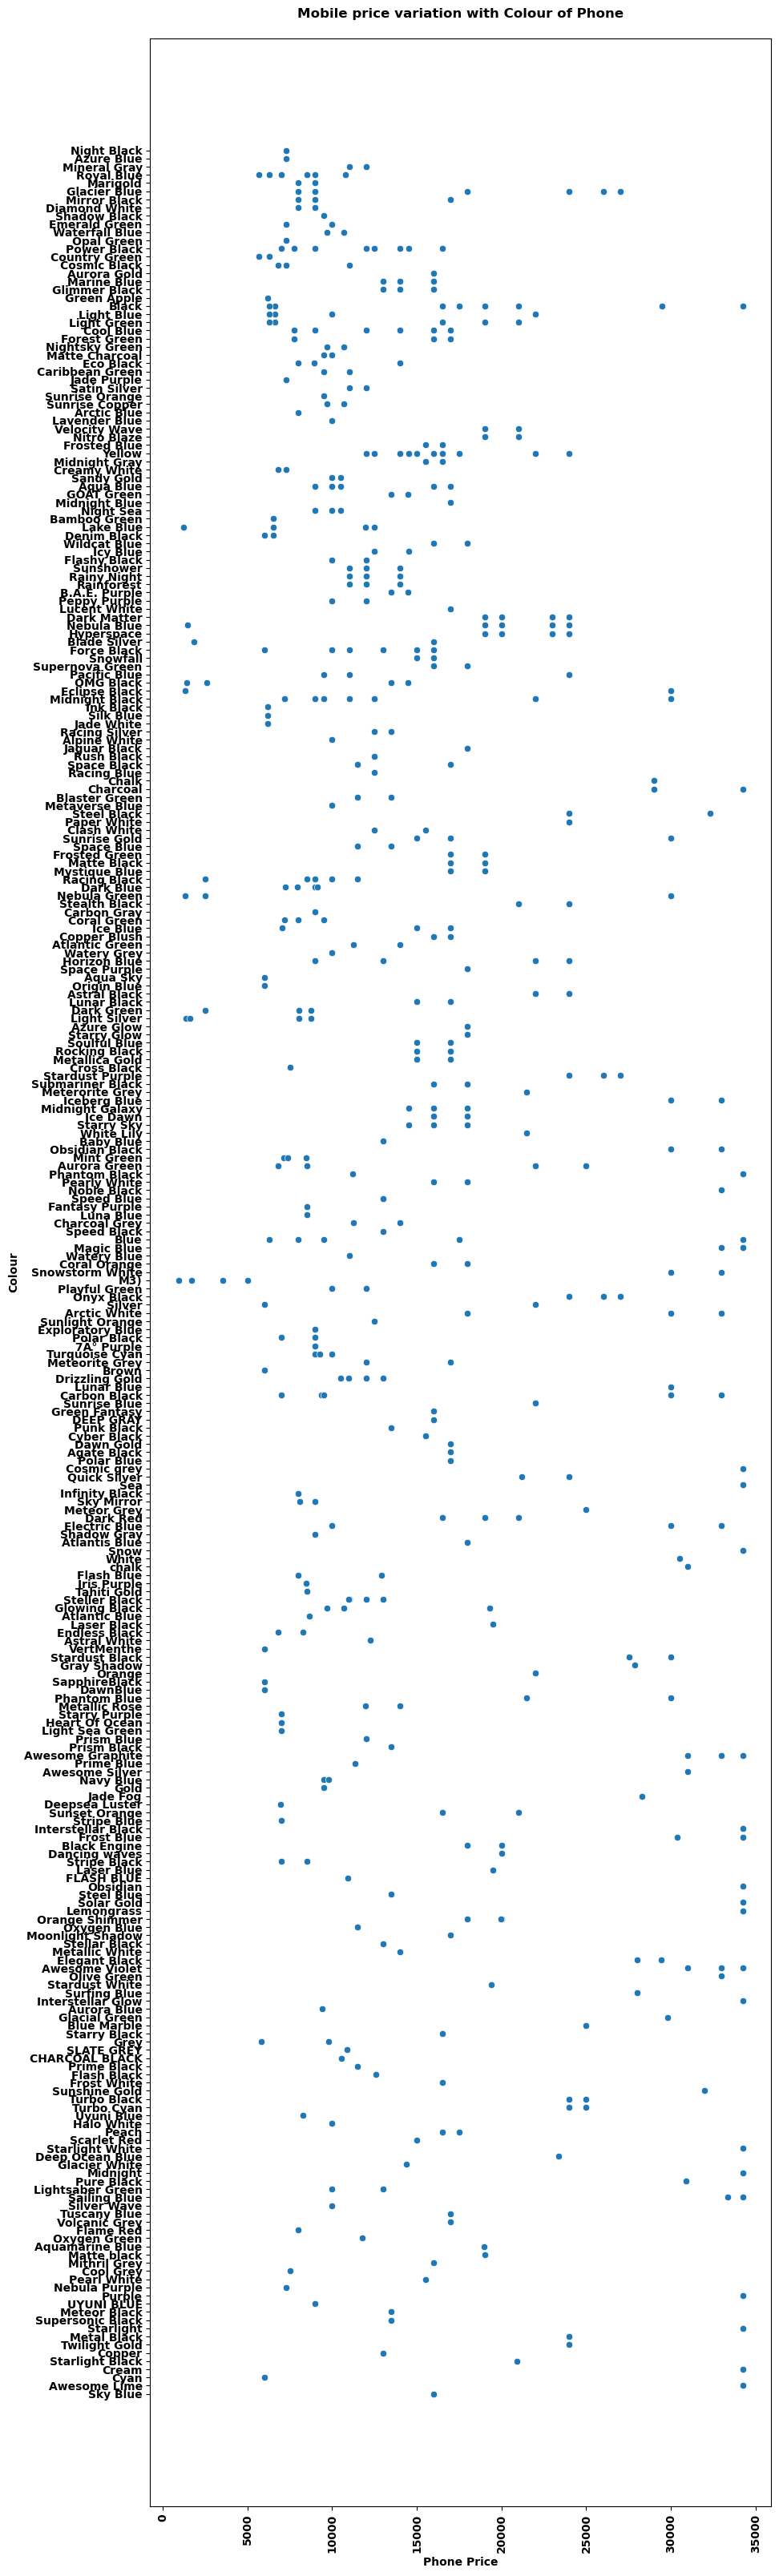

In [85]:
plt.figure(figsize=(10,40))
sns.scatterplot(data = mobile_data,x = 'Phone Price',y="Colour")
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Colour of Phone\n')
plt.show()